# 01 - Data Exploration

This notebook explores the used cars dataset to understand:
- Dataset structure and dimensions
- Feature types and distributions
- Missing values
- Statistical summaries
- Correlations between features
- Outliers and anomalies

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1. Load the Dataset

In [ ]:
# Load the dataset
# Update the filename to match your actual dataset
df = pd.read_csv('../data/raw/vehicles.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

## 2. Initial Data Inspection

In [12]:
# Display first few rows
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [13]:
df.tail(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426870,7301592119,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,...,NaN,sedan,blue,https://images.craigslist.org/00u0u_eRGgkSql5l...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:40:17-0600
426871,7301591639,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,...,NaN,SUV,NaN,https://images.craigslist.org/00U0U_4VvCQuqnfb...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:30:20-0600
426872,7301591201,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,...,NaN,sedan,white,https://images.craigslist.org/00808_bYj0inoZ58...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:35-0600
426873,7301591202,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,...,NaN,other,white,https://images.craigslist.org/00Q0Q_9VUbj91fKb...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:35-0600
426874,7301591199,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,...,NaN,sedan,white,https://images.craigslist.org/00I0I_hJHfjCUppa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:34-0600
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [14]:
# Display column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [15]:
# Statistical summary
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


## 3. Missing Values Analysis

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

              Missing Count  Percentage
county               426880  100.000000
size                 306361   71.767476
cylinders            177678   41.622470
condition            174104   40.785232
VIN                  161042   37.725356
drive                130567   30.586347
paint_color          130203   30.501078
type                  92858   21.752717
manufacturer          17646    4.133714
title_status           8242    1.930753
long                   6549    1.534155
lat                    6549    1.534155
model                  5277    1.236179
odometer               4400    1.030735
fuel                   3013    0.705819
transmission           2556    0.598763
year                   1205    0.282281
description              70    0.016398
image_url                68    0.015930
posting_date             68    0.015930


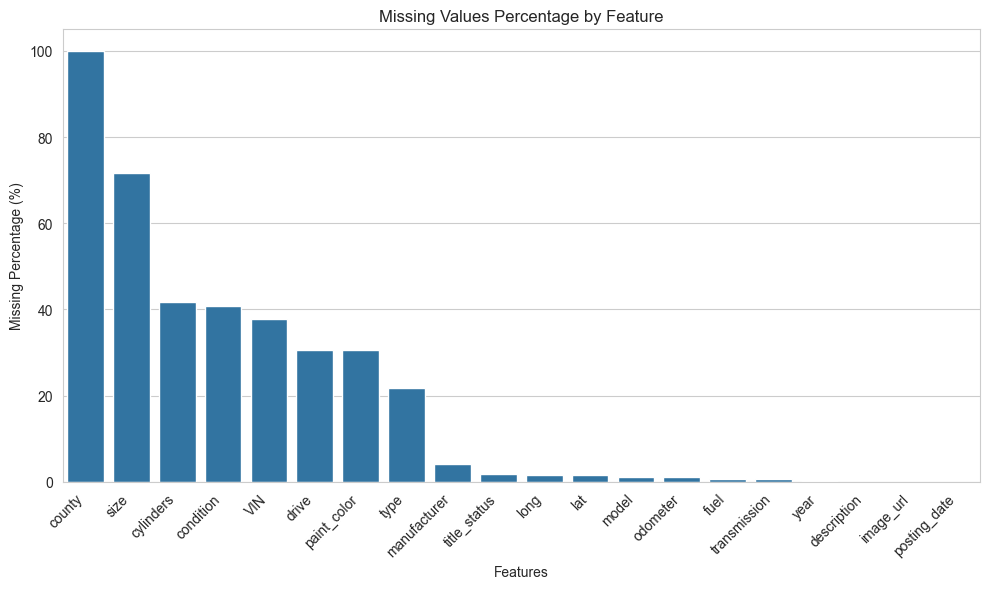

In [17]:
# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y=missing_df['Percentage'])
    plt.title('Missing Values Percentage by Feature')
    plt.xlabel('Features')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

## 4. Target Variable Analysis (Price)

In [18]:
# Assuming 'price' is the target variable - update column name as needed
target_col = 'price'  # Update this to match your dataset

if target_col in df.columns:
    print(f"Target Variable: {target_col}")
    print(f"Mean: ${df[target_col].mean():,.2f}")
    print(f"Median: ${df[target_col].median():,.2f}")
    print(f"Std Dev: ${df[target_col].std():,.2f}")
    print(f"Min: ${df[target_col].min():,.2f}")
    print(f"Max: ${df[target_col].max():,.2f}")

Target Variable: price
Mean: $75,199.03
Median: $13,950.00
Std Dev: $12,182,282.17
Min: $0.00
Max: $3,736,928,711.00


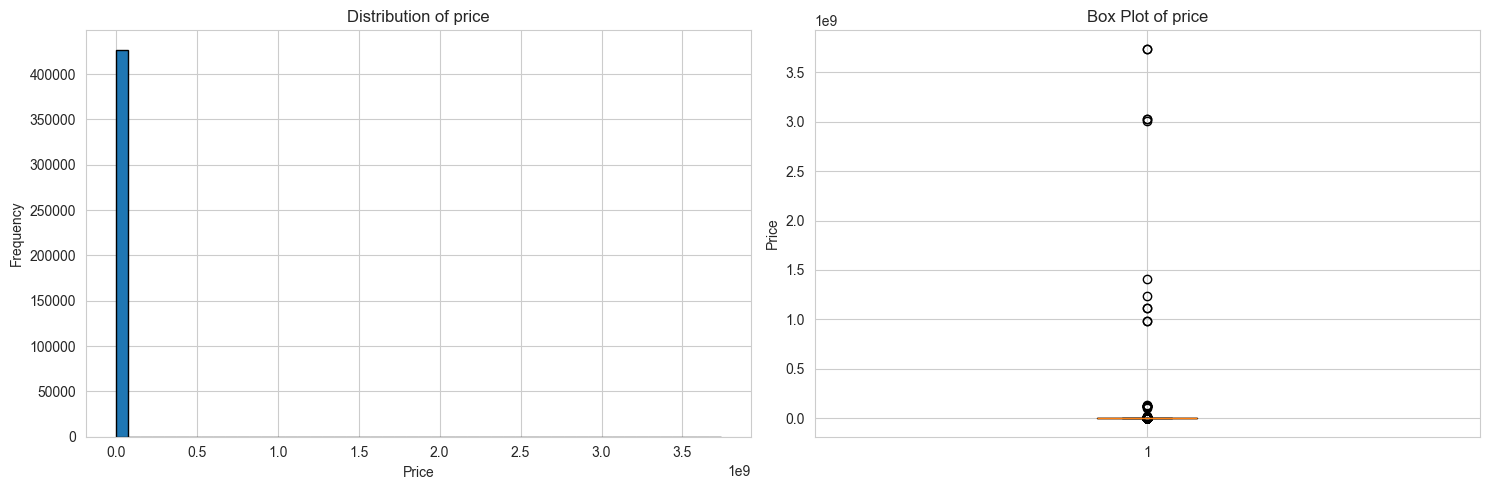

In [19]:
# Distribution of target variable
if target_col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(df[target_col], bins=50, edgecolor='black')
    axes[0].set_title(f'Distribution of {target_col}')
    axes[0].set_xlabel('Price')
    axes[0].set_ylabel('Frequency')
    
    # Box plot
    axes[1].boxplot(df[target_col])
    axes[1].set_title(f'Box Plot of {target_col}')
    axes[1].set_ylabel('Price')
    
    plt.tight_layout()
    plt.show()

## 5. Numerical Features Analysis

In [20]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical features: {numerical_cols}")

Numerical features: ['id', 'price', 'year', 'odometer', 'county', 'lat', 'long']


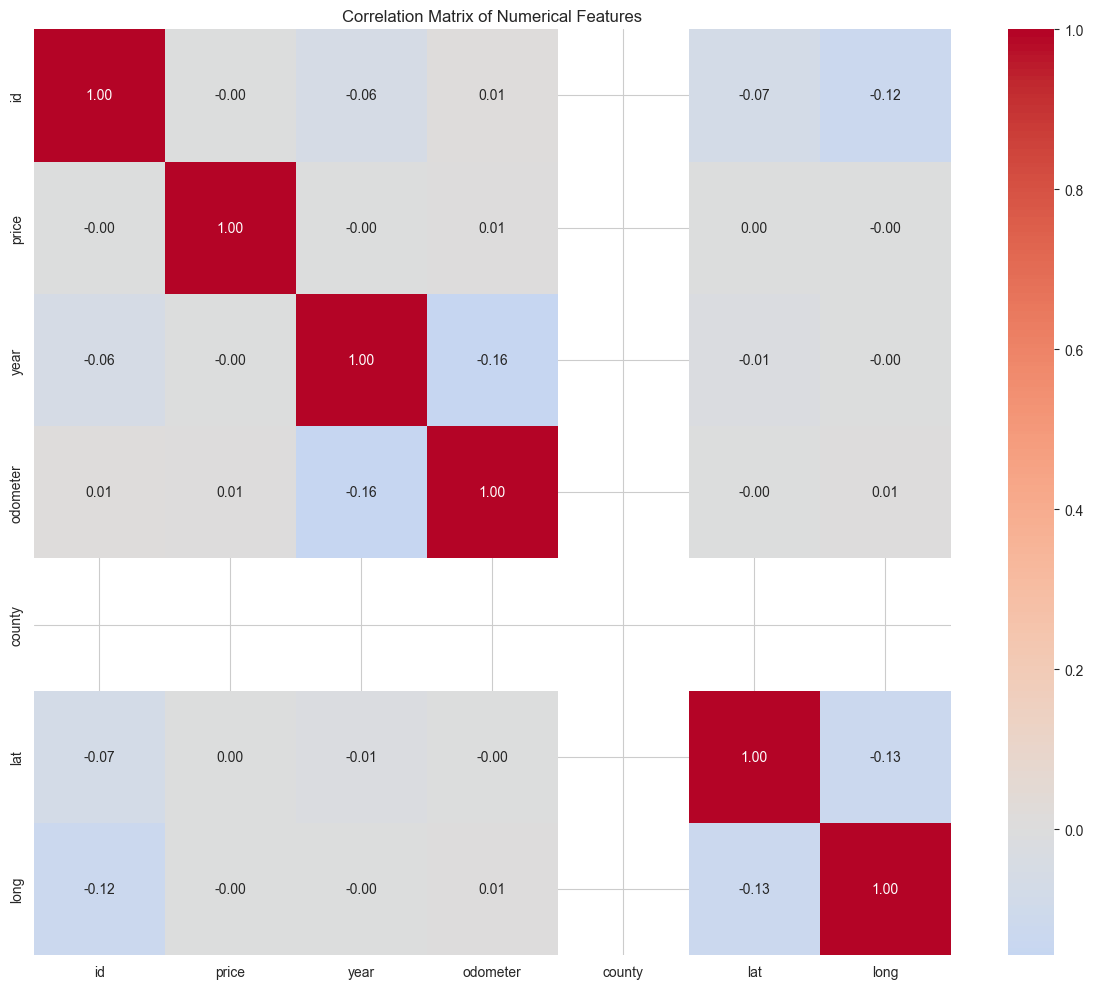

In [21]:
# Correlation matrix
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()

## 6. Categorical Features Analysis

In [23]:
# Select categorical columns
if df.empty:
    print("The DataFrame is empty. Please check your data.")
else:
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    if not categorical_cols:
        print("No categorical features found in the DataFrame.")
    else:
        print(f"Categorical features: {categorical_cols}")
        
        # Display unique values for each categorical column
        for col in categorical_cols:
            print(f"\n{col}: {df[col].nunique()} unique values")
            print(df[col].value_counts().head(10))

Categorical features: ['url', 'region', 'region_url', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'state', 'posting_date']

url: 426880 unique values
url
https://wyoming.craigslist.org/ctd/d/atlanta-2017-genesis-g80-38-sedan-4d/7301949724.html       1
https://wyoming.craigslist.org/ctd/d/atlanta-2018-genesis-g80-38-sedan-4d/7301950980.html       1
https://wyoming.craigslist.org/ctd/d/atlanta-2019-alfa-romeo-giulia-ti-sedan/7301951550.html    1
https://wyoming.craigslist.org/ctd/d/atlanta-2017-infiniti-qx80-sport/7301951544.html           1
https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt6-premium/7301952155.html    1
https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt6-premium/7301953587.html    1
https://wyoming.craigslist.org/ctd/d/atlanta-2019-toyota-4runner-limited/7301954392.html        1
https://wyoming.craigslist.org/ctd/d/b

## 7. Key Insights and Next Steps

**Document your findings here:**
- What patterns did you observe?
- Which features seem most important?
- What data quality issues need to be addressed?
- What preprocessing steps are needed?